# Compute Selection - Vision

Under this scenario, a score from 0-10, with 10 being closest match, is generated comparing a baseline response against an actual response.

In [8]:
import common
import os
from PIL import Image
import requests
from io import BytesIO

In [9]:
# Get a configured model
client = common.get_openai_client(
        api_key=common.api_KEY,
        api_version=common.api_version,
        azure_endpoint=common.api_URI)

In [10]:
def call_openai(url:str,prompt:str,max_tokens=1000,temperature=0.2):
    response = client.chat.completions.create(
            model=common.gpt_api_deployment,
            messages=[
                {
                "role": "system",
                "content": "You are a helpful assistant that can help provide a compute recommendation based on the provided information. Use only the provided information."
                },
                {
                "role": "user",
                "content": [
                    {"type": "text", "text": prompt},
                    {
                    "type": "image_url",
                    "image_url": {
                        "url": url,
                        "detail": "high"
                    },
                    },
                ],
                }
            ],
            max_tokens=max_tokens,
            temperature=temperature
        )
    return str(response.choices[0].message.content)

In [11]:
def get_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((img.width//2, img.height//2))
    return img


In [12]:
url = "https://alemoraoaist.z13.web.core.windows.net/images/services-mindmap.png"


In [13]:
def full_process(url, question):
    print("Image:")
    get_image(url).show()
    print("User:")
    common.split_sentence(question)
    print("\nAssistant:")
    ans = call_openai(url,question)
    common.split_sentence(ans)

Image:


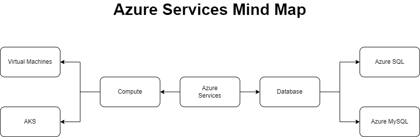

User:
Describe what is in the image.

Assistant:
The image is a mind map labeled "Azure Services Mind Map." It has two main categories connected to the central label
"Azure Services": "Compute" and "Database." Under "Compute," there are two sub-categories: - Virtual Machines - AKS
(Azure Kubernetes Service) Under "Database," there are two sub-categories: - Azure SQL - Azure MySQL Each sub-category
is connected to its main category with a line, indicating a relationship or classification under the main category.


In [14]:
question = "Describe what is in the image."
full_process(url, question)

Image:


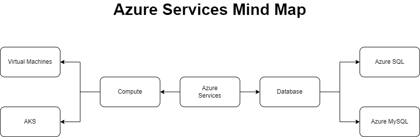

User:
Turn the mind map into a list Output format: === Title: // Mind map title Node: // Node title Children: // List of
children ===

Assistant:
=== Title: Azure Services Mind Map Node: Azure Services Children: Compute, Database Node: Compute Children: Virtual
Machines, AKS Node: Database Children: Azure SQL, Azure MySQL ===


In [28]:
question = """Turn the mind map into a list 

Output format: ===
Title: // Mind map title
Node: // Node title
  Children: // List of children
===
"""
full_process(url, question)